In [2]:
import warnings
warnings.filterwarnings("ignore")

# DecisionTreeClassifier

Training score:1.000000
Testing score:0.789107


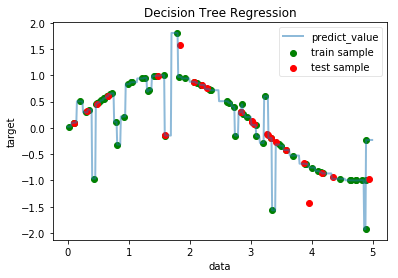

In [7]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import  datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#  于生成回归问题的数据集
def creat_data(n):
    np.random.seed(0)
    X = 5 * np.random.rand(n, 1)
    y = np.sin(X).ravel()
    noise_num=(int)(n/5)
    # 每第5个样本，就在该样本的值上添加噪音
    y[::5] += 3 * (0.5 - np.random.rand(noise_num)) 
    # 拆分原始数据集为训练集和测试集，其中测试集大小为元素数据集大小的 1/4
    return train_test_split(X, y,test_size=0.25,random_state=1) 

# 测试 DecisionTreeRegressor 的用法
def test_DecisionTreeRegressor(*data):
    X_train,X_test,y_train,y_test=data
    regr = DecisionTreeRegressor()
    regr.fit(X_train, y_train)
    print("Training score:%f"%(regr.score(X_train,y_train)))
    print("Testing score:%f"%(regr.score(X_test,y_test)))
    ##绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    X = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
    Y = regr.predict(X)
    ax.scatter(X_train, y_train, label="train sample",c='g')
    ax.scatter(X_test, y_test, label="test sample",c='r')
    ax.plot(X, Y, label="predict_value", linewidth=2,alpha=0.5)
    ax.set_xlabel("data")
    ax.set_ylabel("target")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()
X_train,X_test,y_train,y_test=creat_data(100) # 产生用于回归问题的数据集
test_DecisionTreeRegressor(X_train,X_test,y_train,y_test) # 调用 test_DecisionTreeRegressor

In [9]:
regr = DecisionTreeRegressor()
??regr

In [10]:
# 测试 DecisionTreeRegressor 预测性能随划分类型的影响    
def test_DecisionTreeRegressor_splitter(*data):
    X_train,X_test,y_train,y_test=data
    splitters=['best','random']
    for splitter in splitters:
        regr = DecisionTreeRegressor(splitter=splitter)
        regr.fit(X_train, y_train)
        print("Splitter %s"%splitter)
        print("Training score:%f"%(regr.score(X_train,y_train)))
        print("Testing score:%f"%(regr.score(X_test,y_test)))
test_DecisionTreeRegressor_splitter(X_train,X_test,y_train,y_test) 

Splitter best
Training score:1.000000
Testing score:0.789107
Splitter random
Training score:1.000000
Testing score:0.641796


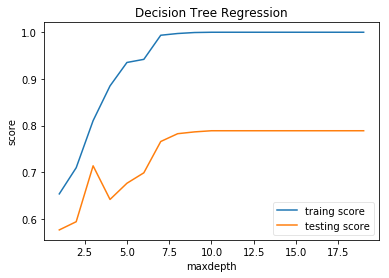

In [11]:
# 测试 DecisionTreeRegressor 预测性能随  max_depth 的影响
def test_DecisionTreeRegressor_depth(*data,maxdepth):
    X_train,X_test,y_train,y_test=data
    depths=np.arange(1,maxdepth)
    training_scores=[]
    testing_scores=[]
    for depth in depths:
        regr = DecisionTreeRegressor(max_depth=depth)
        regr.fit(X_train, y_train)
        training_scores.append(regr.score(X_train,y_train))
        testing_scores.append(regr.score(X_test,y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label="traing score")
    ax.plot(depths,testing_scores,label="testing score")
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Regression")
    ax.legend(framealpha=0.5)
    plt.show()
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=20)

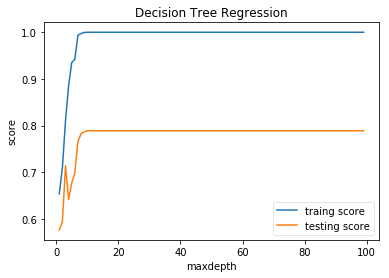

In [13]:
test_DecisionTreeRegressor_depth(X_train,X_test,y_train,y_test,maxdepth=100)

# DecisionTreeClassifier

In [1]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
iris=datasets.load_iris() # 使用 scikit-learn 自带的 iris 数据集
X_train=iris.data
y_train=iris.target
# 分层采样拆分成训练集和测试集，测试集大小为原始数据集大小的 1/4
X_train,X_test,y_train,y_test = train_test_split(X_train, y_train,test_size=0.25,random_state=0,stratify=y_train)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
print("Training score:%f"%(clf.score(X_train,y_train)))
print("Testing score:%f"%(clf.score(X_test,y_test)))

Training score:1.000000
Testing score:0.947368


In [16]:
# 测试 DecisionTreeClassifier 的预测性能随 criterion 参数的影响
def test_DecisionTreeClassifier_criterion(*data):
    X_train,X_test,y_train,y_test=data
    criterions=['gini','entropy']
    for criterion in criterions:
        clf = DecisionTreeClassifier(criterion=criterion)
        clf.fit(X_train, y_train)
        print("criterion:%s"%criterion)
        print("Training score:%f"%(clf.score(X_train,y_train)))
        print("Testing score:%f"%(clf.score(X_test,y_test)))
test_DecisionTreeClassifier_criterion(X_train,X_test,y_train,y_test) 

criterion:gini
Training score:1.000000
Testing score:0.973684
criterion:entropy
Training score:1.000000
Testing score:0.921053


In [18]:
# 测试 DecisionTreeClassifier 的预测性能随划分类型的影响
def test_DecisionTreeClassifier_splitter(*data):
    X_train,X_test,y_train,y_test=data
    splitters=['best','random']
    for splitter in splitters:
        clf = DecisionTreeClassifier(splitter=splitter)
        clf.fit(X_train, y_train)
        print("splitter:%s"%splitter)
        print("Training score:%f"%(clf.score(X_train,y_train)))
        print("Testing score:%f"%(clf.score(X_test,y_test)))
test_DecisionTreeClassifier_splitter(X_train,X_test,y_train,y_test)

splitter:best
Training score:1.000000
Testing score:0.973684
splitter:random
Training score:1.000000
Testing score:0.973684


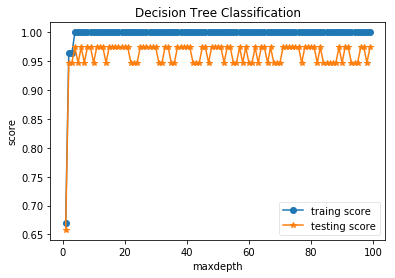

In [19]:
# 测试 DecisionTreeClassifier 的预测性能随 max_depth 参数的影响
def test_DecisionTreeClassifier_depth(*data,maxdepth):
    X_train,X_test,y_train,y_test=data
    depths=np.arange(1,maxdepth)
    training_scores=[]
    testing_scores=[]
    for depth in depths:
        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(X_train, y_train)
        training_scores.append(clf.score(X_train,y_train))
        testing_scores.append(clf.score(X_test,y_test))

    ## 绘图
    fig=plt.figure()
    ax=fig.add_subplot(1,1,1)
    ax.plot(depths,training_scores,label="traing score",marker='o')
    ax.plot(depths,testing_scores,label="testing score",marker='*')
    ax.set_xlabel("maxdepth")
    ax.set_ylabel("score")
    ax.set_title("Decision Tree Classification")
    ax.legend(framealpha=0.5,loc='best')
    plt.show()
test_DecisionTreeClassifier_depth(X_train,X_test,y_train,y_test,maxdepth=100)

In [20]:
from sklearn.tree import export_graphviz
# 保存为.dot文件
with open('./iris.dot','w',encoding='utf-8') as f:
    f=export_graphviz(clf,out_file=f)
import graphviz
# 保存为.pdf文件
dot_data = export_graphviz(clf,out_file=f)
graph = graphviz.Source(dot_data)
graph.render(view=True, format="pdf", filename="decisiontree_pdf")

In [2]:

from sklearn.tree import export_graphviz
import pydot
X_train,X_test,y_train,y_test=load_data()
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)
export_graphviz(clf, out_file = './iris.dot', rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('./iris.dot')
graph.write_png('./iris.png'); 

ModuleNotFoundError: No module named 'pydot'